In [3]:
import pandas as pd
df = pd.read_csv('heart.csv') 
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

In [4]:
df_encoded = pd.get_dummies(df, columns=['sex','trestbps','chol','fbs','restecg','thalach'], drop_first=True)
print(df_encoded.head())

   age  cp  exang  oldpeak  slope  ca  thal  target  sex_1  trestbps_100  ...  \
0   63   3      0      2.3      0   0     1       1   True         False  ...   
1   37   2      0      3.5      0   0     2       1   True         False  ...   
2   41   1      0      1.4      2   0     2       1  False         False  ...   
3   56   1      0      0.8      2   0     2       1   True         False  ...   
4   57   0      1      0.6      2   0     2       1  False         False  ...   

   thalach_184  thalach_185  thalach_186  thalach_187  thalach_188  \
0        False        False        False        False        False   
1        False        False        False         True        False   
2        False        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   thalach_190  thalach_192  thalach_194  thalach_195  thalach_202  
0        False        F

In [11]:
X = df_encoded.drop(columns=['target'])
y = df['target']
features_scaled = StandardScaler().fit_transform(X)

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components)
pca_df['target'] = y.values
print(pca_df.head())

          0         1         2         3         4         5         6  \
0  1.428876  0.882048 -0.012400  1.088165 -0.042917 -0.829514  0.851048   
1 -0.487249 -0.473343  0.098081 -0.651005 -1.334177  0.591716 -0.049129   
2 -2.362275  0.022970  1.009006  0.144978  0.588566 -0.096029 -0.256296   
3 -1.815500 -0.315242 -0.115714 -0.291879 -0.141362 -0.452501 -1.013884   
4 -1.260918 -0.621969  0.379254 -0.588548  0.750530 -1.170252 -0.104478   

          7         8         9  ...       188       189       190       191  \
0  1.517717  0.384134 -1.100258  ... -0.372034  0.584925  0.467638  0.376182   
1  1.438791 -0.026068  0.539195  ... -0.346134 -0.361650 -1.358042 -0.593587   
2 -0.514653  0.643947  0.076826  ...  1.270821 -0.008208  0.592385  1.079033   
3  0.687144 -1.335473  0.614813  ... -1.669457  0.191114  0.005481 -0.084196   
4 -0.392583 -2.009587  0.625769  ... -0.690290 -0.038002  0.227926 -0.368052   

        192       193       194       195       196  target  
0 -0.4

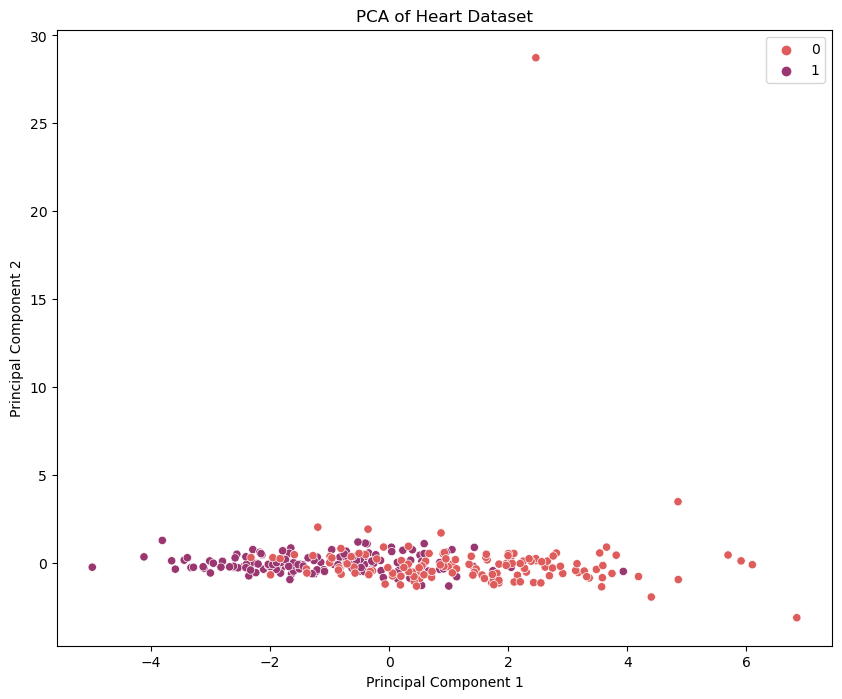

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x=0, y=1, hue='target', palette='flare')
plt.title('PCA of Heart Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [27]:
from sklearn.ensemble import RandomForestRegressor 
X = df_encoded.drop(columns=['target'])
y = df['target']
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance':importances})
feature_importance_df = feature_importance_df.sort_values(by='importance',ascending=False) 
print(feature_importance_df)

         feature  importance
1             cp    0.211240
5             ca    0.122079
6           thal    0.105176
3        oldpeak    0.100891
0            age    0.053640
..           ...         ...
171     chol_294    0.000000
172     chol_295    0.000000
173     chol_298    0.000000
175     chol_300    0.000000
299  thalach_202    0.000000

[300 rows x 2 columns]


In [31]:
from sklearn.feature_selection import Ran

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Selected features: ", selected_features)

Selected features:  Index(['age', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'sex_1',
       'trestbps_130', 'restecg_1'],
      dtype='object')


In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X[selected_features], y)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best score:  -0.22167939259233385


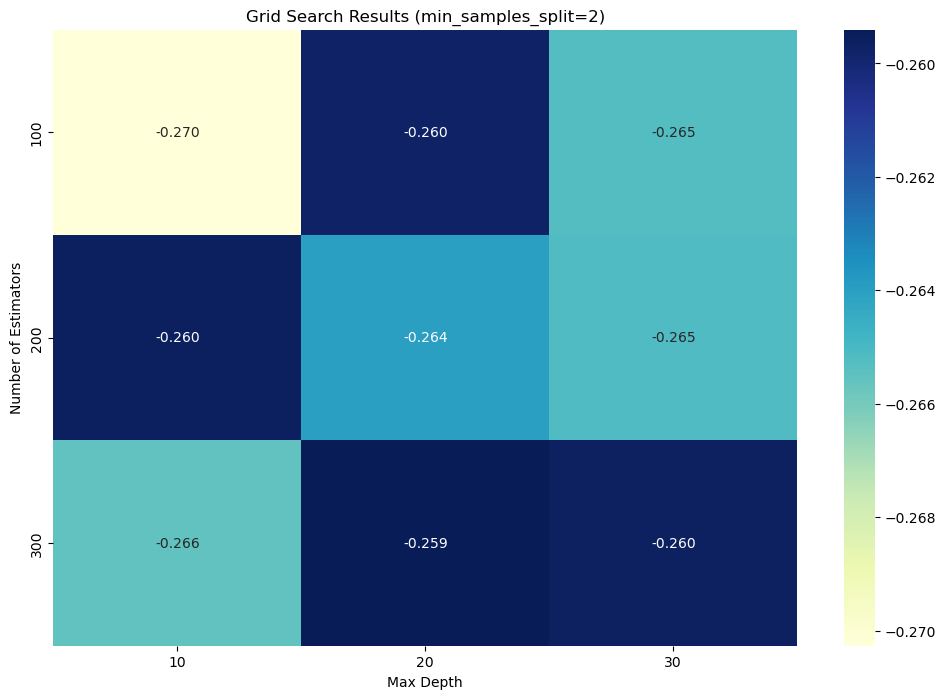

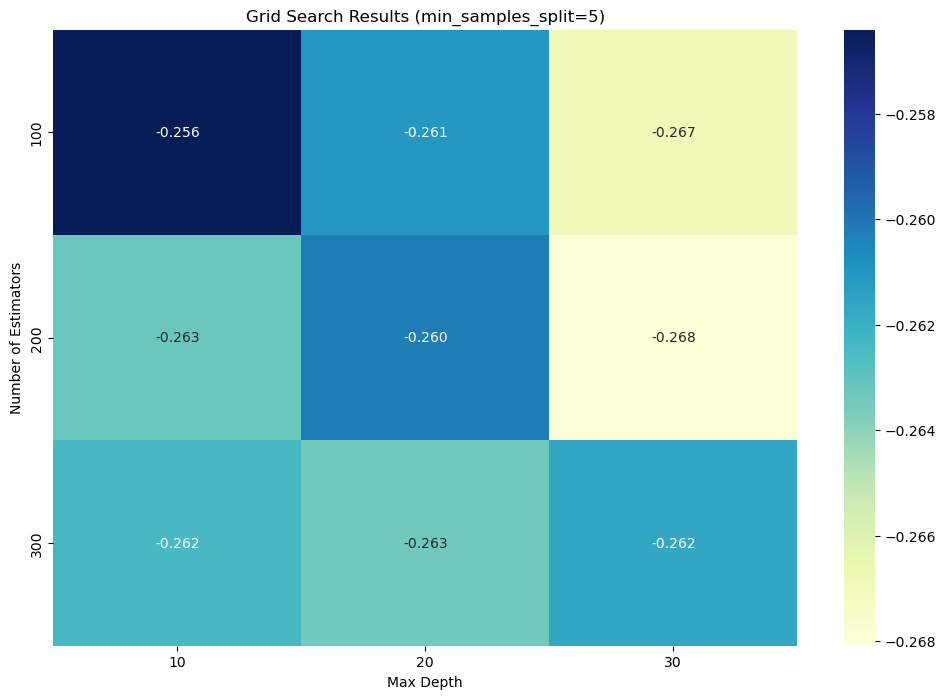

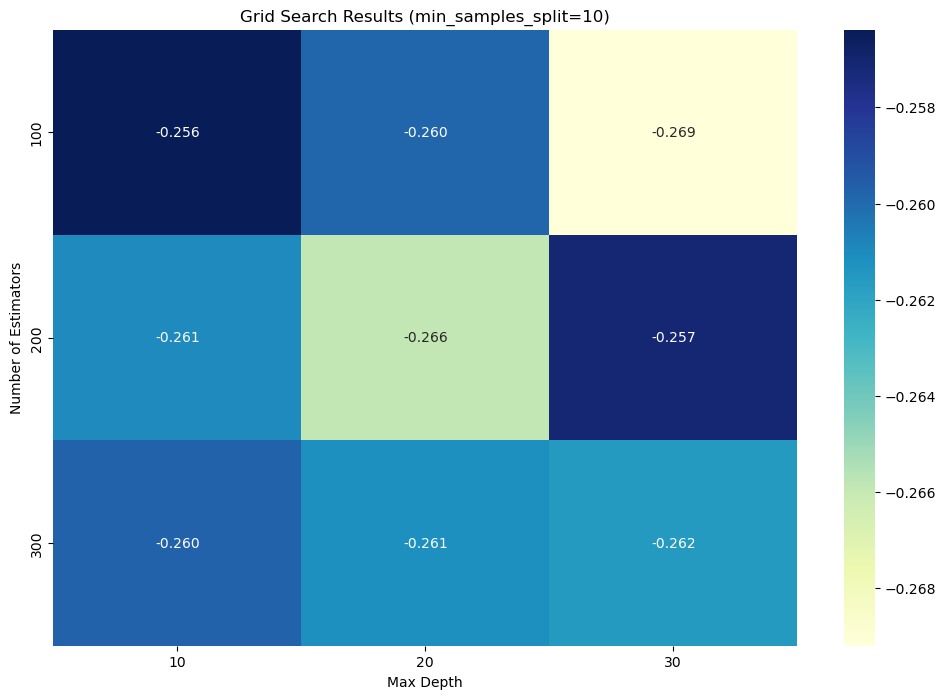

In [36]:
from sklearn.model_selection import GridSearchCV 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']
results_df = pd.DataFrame(params)
results_df['mean_test_score'] = mean_test_scores
for min_samples_split in results_df['min_samples_split'].unique():
    subset_df = results_df[results_df['min_samples_split'] == min_samples_split]
    pivot_table = subset_df.pivot(index='n_estimators', columns='max_depth',values='mean_test_score')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu") 
    plt.title(f'Grid Search Results (min_samples_split={min_samples_split})') 
    plt.xlabel('Max Depth')
    plt.ylabel('Number of Estimators')
    plt.show()